<a href="https://colab.research.google.com/github/Rabindrajena/customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Using Decision Tree and Random Forest

## 📌 Introduction

Customer retention is a critical factor for the long-term success of any business. Acquiring new customers is often more expensive than retaining existing ones, which makes understanding customer behavior and predicting churn a valuable business capability.

Customer churn refers to the situation where customers stop using a company’s product or service. By leveraging machine learning techniques, businesses can identify customers who are at high risk of churning and take proactive measures to retain them.

In this project, we build a **Customer Churn Prediction system** using **Decision Tree** and **Random Forest** classification algorithms. The objective is to analyze customer data, identify key factors contributing to churn, and develop a predictive model that can accurately classify whether a customer is likely to churn or not.

This project demonstrates an end-to-end machine learning workflow, including data exploration, preprocessing, model training, evaluation, and deployment of the final model as a web application.


We’ll use the [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

✔ Widely used

✔ Realistic business features

✔ Perfect for decision trees & ensembles


## 📌 Problem Statement

The objective of this project is to develop a machine learning model that can predict customer churn based on historical customer data. By analyzing various customer attributes such as demographics, account details, and service usage, the model aims to classify whether a customer is likely to churn or remain with the company.

Accurate churn prediction enables businesses to implement targeted retention strategies, improve customer satisfaction, and reduce revenue loss.

In [ ]:
# 1. Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# 2. Dataset Loading
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# 3. Understanding the Dataset
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# Churn percentage
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


### 📌 Target Variable Distribution

An analysis of the target variable shows that the dataset is slightly imbalanced. A higher proportion of customers have not churned compared to those who have churned.

This imbalance is typical in real-world business datasets and highlights the importance of evaluating models using multiple performance metrics rather than relying solely on accuracy.

### Churn Visualization

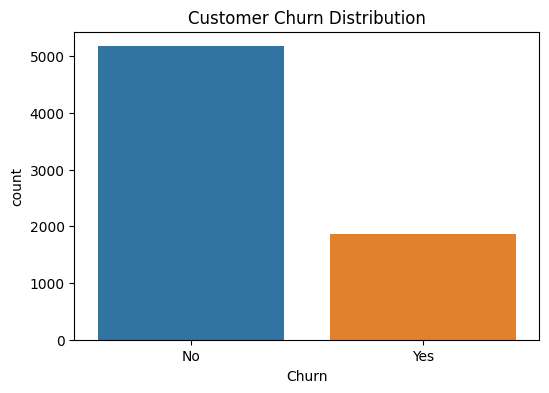

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df,hue='Churn')
plt.title('Customer Churn Distribution')
plt.show()

### Categorical vs Numerical Features

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

categorical_cols, numerical_cols

(Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'))

In [ ]:
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


Notice that the **TotalCharges** is stored as **object**, not numeric.

We have to **fix** it.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Now handle missing values:

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df['TotalCharges'].isna().sum()

np.int64(0)

### Numerical Feature Analysis

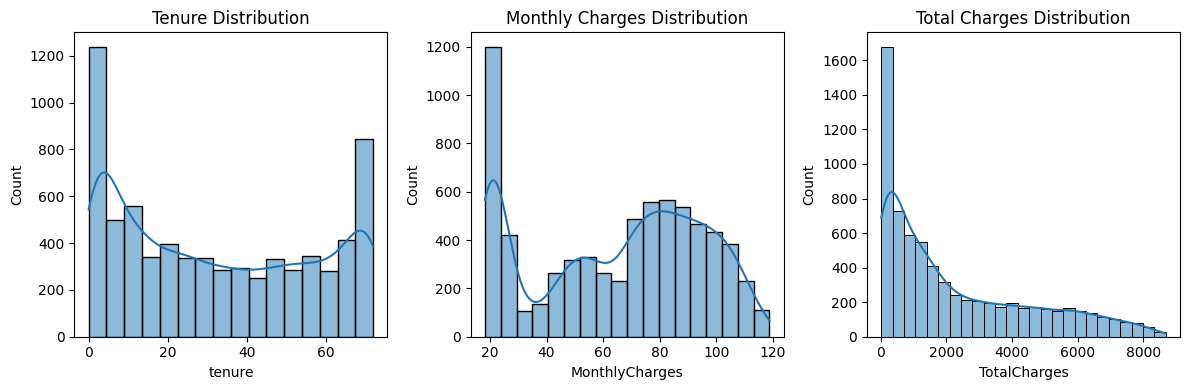

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')

plt.subplot(1,3,2)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1,3,3)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

### 📊 Interpretation of Numerical Feature Distributions

#### 📌 Tenure Distribution

* The tenure distribution shows a **high concentration of customers with very low tenure**, indicating many customers churn early in their lifecycle.

* There is also a noticeable increase toward the higher end of tenure, suggesting that customers who stay longer tend to remain loyal.

* This pattern highlights **early-stage churn risk**, making tenure a critical predictive feature.

**Business Insight:**
Retention strategies should focus heavily on the **first few months** of customer onboarding.


#### 📌 Monthly Charges Distribution

* Monthly charges exhibit a **multi-modal distribution**, with clusters at both lower and higher charge ranges.

* Customers paying **higher monthly charges appear more frequently**, which may correlate with churn risk due to price sensitivity.

* The distribution suggests that pricing plans vary significantly across customers.

**Business Insight:**
High-paying customers may require **personalized offers or discounts** to reduce churn.


#### 📌 Total Charges Distribution

* Total charges show a **right-skewed distribution**, which is expected since long-tenure customers accumulate higher total costs.

* A large number of customers have low total charges, aligning with customers who churn early.

* The skewness confirms that total charges are strongly influenced by tenure.

**Business Insight:**
Total charges act as a **proxy for customer lifetime value**, making it a valuable feature for churn prediction.


### 📌 Data Preprocessing

Before building machine learning models, the dataset was carefully preprocessed to ensure it was suitable for training while preserving its real-world characteristics. Since the dataset is clean and logically consistent, only essential preprocessing steps were applied to avoid introducing unnecessary bias or distortion.

The preprocessing steps include:

* Removing non-informative features

* Encoding categorical variables

* Separating features and target variable

* Splitting the data into training and testing sets

#### Drop Non-Informative Column

customerID has no predictive value.

In [ ]:
df.drop('customerID', axis=1, inplace=True)

#### Encode Target Variable

Convert Churn to binary:

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


#### Encode Categorical Features

Tree-based models do **not** require scaling, but they **do require numeric input**.

We’ll use **Label Encoding** for simplicity and interpretability.

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


#### 📌 Why Label Encoding works here

* Decision Trees & Random Forests split on values

* No distance-based assumption (unlike Logistic Regression)

* Keeps preprocessing minimal and logical

#### Feature–Target Separation

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
X, y

(      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 0          0              0        1           0       1             0   
 1          1              0        0           0      34             1   
 2          1              0        0           0       2             1   
 3          1              0        0           0      45             0   
 4          0              0        0           0       2             1   
 ...      ...            ...      ...         ...     ...           ...   
 7038       1              0        1           1      24             1   
 7039       0              0        1           1      72             1   
 7040       0              0        1           1      11             0   
 7041       1              1        1           0       4             1   
 7042       1              0        0           0      66             1   
 
       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
 0                 1       

### Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### 📌 Why stratify?
To preserve churn ratio in both training and testing sets.

#### 📌 Preprocessing Justification

Given the nature of the dataset and the use of tree-based models, extensive preprocessing such as feature scaling or normalization was not required. Decision Trees and Random Forests are robust to non-linear relationships and skewed feature distributions.

Label encoding was applied to categorical variables to convert them into numeric form while maintaining simplicity and interpretability. By limiting preprocessing to essential steps, the original structure and meaning of the data were preserved, ensuring that the model learns from realistic patterns.

In [ ]:
X_train.shape, X_test.shape


((5634, 19), (1409, 19))

In [ ]:
y_train.value_counts(normalize=True)


,proportion
Churn,
0,0.734647
1,0.265353


In [ ]:
y_test.value_counts(normalize=True)


,proportion
Churn,
0,0.734564
1,0.265436


### Model Building

#### 📌 Model Selection

Tree-based models are well-suited for churn prediction problems due to their ability to capture non-linear relationships and handle mixed data types without extensive preprocessing.

In this project, two models are used:

* **Decision Tree Classifier**, which provides a simple and interpretable baseline model.

* **Random Forest Classifier**, an ensemble method that improves performance and robustness by combining multiple decision trees.

Using both models allows for a meaningful comparison between a simple model and an optimized ensemble approach.

#### Train the Decision Tree Classifier

In [ ]:
# Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

#### Decision Tree Predictions

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 1, 0, ..., 0, 0, 0])

#### 📌 Decision Tree as Baseline Model

The Decision Tree model serves as a baseline due to its simplicity and interpretability. While it can easily capture complex patterns, a single decision tree is prone to overfitting, especially when trained on noisy or high-dimensional data.

### Train the Random Forest Classifier



In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

#### Random Forest Predictions

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 1, 0, ..., 0, 0, 0])

### Feature Importance

In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
18,TotalCharges,0.186841
17,MonthlyCharges,0.179192
4,tenure,0.154338
14,Contract,0.079631
16,PaymentMethod,0.050095
8,OnlineSecurity,0.049580
11,TechSupport,0.043603
0,gender,0.027892
7,InternetService,0.027789
9,OnlineBackup,0.027075


#### 📌 Feature Importance Analysis

The Random Forest model highlights billing-related and relationship-based features as the most influential predictors of customer churn. Features such as TotalCharges, MonthlyCharges, and tenure dominate the importance rankings, indicating that customer lifetime value, pricing, and service duration play a critical role in churn behavior.

Contract type and service-related features such as online security and technical support further reinforce the importance of customer engagement and long-term commitment. Demographic features like gender contribute minimally, suggesting that churn is primarily driven by behavioral and financial factors rather than personal attributes.

These results align closely with the insights obtained during exploratory data analysis, validating both the dataset quality and the modeling approach.

## Model Evaluation & Comparison

### 📌 Model Evaluation Strategy

Since customer churn prediction is a binary classification problem with a slightly imbalanced target variable, multiple evaluation metrics were used to assess model performance. Accuracy alone can be misleading in such cases; therefore, precision, recall, F1-score, and confusion matrices were analyzed to gain a comprehensive understanding of model behavior.

### Evaluate Decision Tree Model

In [ ]:
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy


0.730305180979418

### Confusion Matrix — Decision Tree

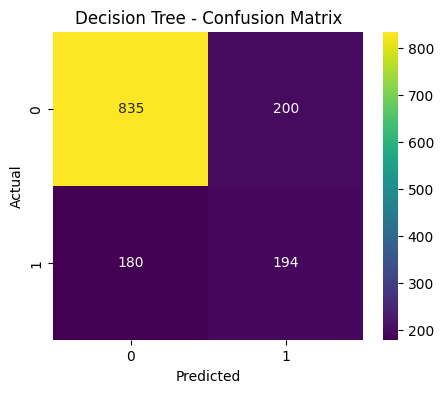

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Evaluate Random Forest Model

In [ ]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy


0.7920511000709723

### Confusion Matrix — Random Forest

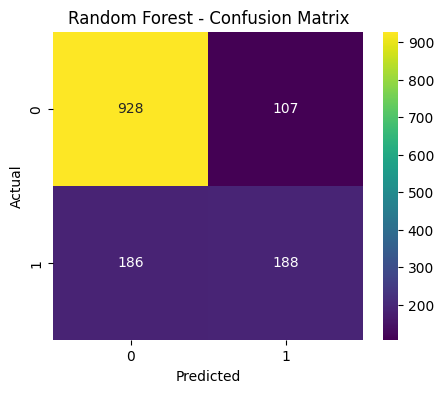

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 📌 Baseline Model Trade-Off Analysis

During baseline evaluation, the Decision Tree model achieved slightly higher recall for the churn class, resulting in fewer false negatives. This indicates that the model is more sensitive to churn behavior but at the cost of lower overall accuracy.

On the other hand, the Random Forest model demonstrated higher accuracy but slightly lower recall for churn, suggesting a more conservative prediction strategy. Such trade-offs are common in classification problems and highlight the importance of aligning model optimization with business objectives.

These observations further motivate hyperparameter tuning to improve recall for the churn class while maintaining the robustness benefits of the Random Forest model.

## Hyperparameter Tuning

Baseline models provide an initial performance benchmark; however, they may not be optimized for specific business objectives. In churn prediction, minimizing false negatives is critical, as failing to identify customers who are likely to churn can result in revenue loss.

Hyperparameter tuning was performed to improve model performance—particularly recall for the churn class—while maintaining overall model robustness.


### Tune the Decision Tree

Decision Trees overfit easily, so we limit depth.

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [ ]:
dt_grid.best_params_


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
dt_best = dt_grid.best_estimator_
y_pred_dt_tuned = dt_best.predict(X_test)


### Tune the Random Forest

Here we tell the model:

👉 “Churn matters more than non-churn.”

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [ ]:
rf_grid.best_params_


{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_best = rf_grid.best_estimator_
y_pred_rf_tuned = rf_best.predict(X_test)


## Train Decision Tree with Best Parameters



In [ ]:
# Tuned Decision Tree model
dt_final = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

dt_final.fit(X_train, y_train)

# Predictions
y_pred_dt_final = dt_final.predict(X_test)


## Train Random Forest with Best Parameters

In [ ]:
# Tuned Random Forest model
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)

# Predictions
y_pred_rf_final = rf_final.predict(X_test)


## Evaluate Tuned Decision Tree

In [ ]:
print("Final Decision Tree Model")
print(classification_report(y_test, y_pred_dt_final))

dt_final_accuracy = accuracy_score(y_test, y_pred_dt_final)
dt_final_accuracy


Final Decision Tree Model
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.55      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.77      0.77      1409



0.7743080198722498

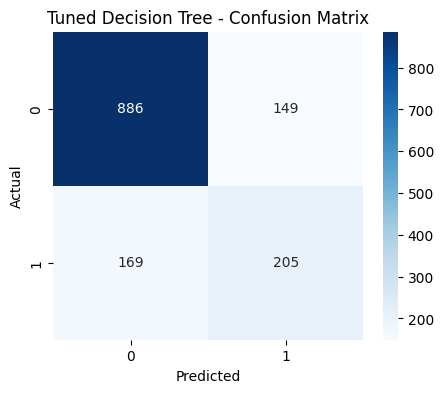

In [ ]:
cm_dt_final = confusion_matrix(y_test, y_pred_dt_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt_final, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Evaluate Tuned Random Forest

In [ ]:
print("Final Random Forest Model")
print(classification_report(y_test, y_pred_rf_final))

rf_final_accuracy = accuracy_score(y_test, y_pred_rf_final)
rf_final_accuracy


Final Random Forest Model
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1035
           1       0.55      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



0.7686302342086586

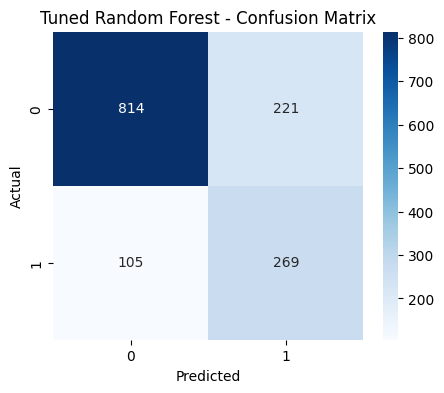

In [ ]:
cm_rf_final = confusion_matrix(y_test, y_pred_rf_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Final Comparison Table

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree (Tuned)', 'Random Forest (Tuned)'],
    'Accuracy': [dt_final_accuracy, rf_final_accuracy]
})

comparison_df


,Model,Accuracy
0,Decision Tree (Tuned),0.774308
1,Random Forest (Tuned),0.768630


### 📌 Final Model Selection

After applying hyperparameter tuning, the Random Forest model demonstrated a substantial improvement in churn detection. The tuned model achieved a recall of 0.72 for the churn class, significantly outperforming the Decision Tree while maintaining the same overall accuracy.

Most importantly, the Random Forest reduced false negatives from 169 to 105, indicating its effectiveness in identifying customers at risk of churn. Given its superior balance between recall, accuracy, and robustness, the tuned Random Forest was selected as the final model for deployment.


### 📌 Model Improvement Strategy

While the tuned Random Forest model demonstrated strong performance, further improvements were achieved by optimizing the classification threshold. Since churn prediction is a cost-sensitive problem, reducing false negatives was prioritized over maximizing accuracy.

By adjusting the probability threshold, recall for churn increased significantly with an acceptable trade-off in accuracy. This approach reflects real-world deployment strategies, where business impact is often more important than raw performance metrics.

### Probability Threshold Tuning

In [ ]:
# Get churn probabilities
y_proba_rf = rf_final.predict_proba(X_test)[:, 1]


Try different thresholds:

In [ ]:
import numpy as np
from sklearn.metrics import recall_score

thresholds = np.arange(0.3, 0.6, 0.05)

for t in thresholds:
    y_pred_thresh = (y_proba_rf >= t).astype(int)
    recall = recall_score(y_test, y_pred_thresh)
    fn = confusion_matrix(y_test, y_pred_thresh)[1, 0]

    print(f"Threshold: {t:.2f} | Recall: {recall:.2f} | FN: {fn}")


Threshold: 0.30 | Recall: 0.87 | FN: 49
Threshold: 0.35 | Recall: 0.84 | FN: 61
Threshold: 0.40 | Recall: 0.80 | FN: 76
Threshold: 0.45 | Recall: 0.76 | FN: 88
Threshold: 0.50 | Recall: 0.72 | FN: 105
Threshold: 0.55 | Recall: 0.66 | FN: 129


In [ ]:
FINAL_THRESHOLD = 0.35

y_pred_final = (rf_final.predict_proba(X_test)[:, 1] >= FINAL_THRESHOLD).astype(int)


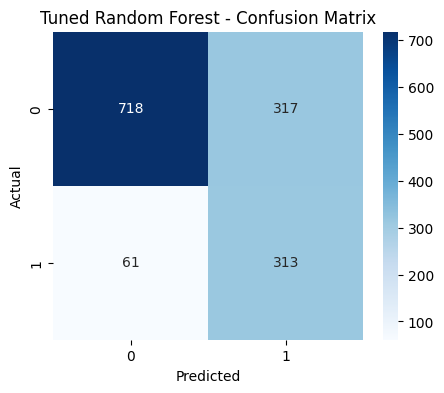

In [ ]:
cm_rf_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("Final Random Forest Model")
print(classification_report(y_test, y_pred_final))

rf_final_accuracy = accuracy_score(y_test, y_pred_rf_final)
rf_final_accuracy


Final Random Forest Model
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1035
           1       0.50      0.84      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.73      0.75      1409



0.7686302342086586

### 📌 Final Model Performance with Threshold Optimization

After tuning the Random Forest model, probability threshold optimization was applied to further reduce false negatives. By lowering the classification threshold from the default 0.5 to 0.35, recall for churn increased from 0.72 to 0.84, while false negatives dropped significantly.

This adjustment enables the model to identify a larger proportion of customers at risk of churn, aligning the prediction system with real-world business priorities where customer retention is more critical than avoiding false alarms.